In [0]:
import pandas as pd
import altair as alt
import os

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
path = os.path.join("drive", "My Drive", "MinneMUDAC2019", "newFiles")
march = pd.read_csv(os.path.join(path,"march_new.csv"),skiprows = 3)
may = pd.read_csv(os.path.join(path,"may_new.csv"),skiprows = 3)
july = pd.read_csv(os.path.join(path,"july_new.csv"),skiprows = 3)[252:]
july = july.reset_index(drop=True)

In [4]:
july = july.reset_index(drop=True)
print(july.head())

         Date     Open     High      Low    Close
0  11/14/2017   994.00   994.00   994.00   994.00
1  11/15/2017  1000.25  1000.25  1000.25  1000.25
2  11/16/2017   998.50   998.50   998.50   998.50
3  11/17/2017  1011.75  1011.75  1011.75  1011.75
4  11/20/2017  1013.75  1013.75  1013.75  1013.75


# **ROC (Rate of change)**

* ROC, is a momentun oscillator that measures the percentage change in price from one time period to the next. 
* It compares the price of the stock today and n-days ago. 
* As a momentum oscillator, ROC signals include centerline crossovers, divergences and overbought-oversold readings.
> * Positive ROC - price increased since the nth day
> * Negative ROC - price decreased since the nth day



In [0]:
march_roc = march['Close'].diff(periods = 12)/ march['Close'].shift(12)
may_roc = may['Close'].diff(periods = 12)/ may['Close'].shift(12)
july_roc = july['Close'].diff(periods = 12)/ july['Close'].shift(12)
march_source = pd.DataFrame({
    'Date': march['Date'],
    'Roc': march_roc
})
may_source = pd.DataFrame({
    'Date': may['Date'],
    'Roc': may_roc
})
july_source = pd.DataFrame({
    'Date': july['Date'],
    'Roc': july_roc
})
march_chart = alt.Chart(march_source).mark_line(color='red').encode(x='Date', y='Roc')
may_chart = alt.Chart(may_source).mark_line(color='green').encode(x='Date', y='Roc')
july_chart = alt.Chart(july_source).mark_line().encode(x='Date', y='Roc')

march_chart+may_chart+july_chart

alt.LayerChart(...)

# **Non-stationary**

In [0]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from pandas.plotting import lag_plot
from pandas import datetime
from sklearn.metrics import mean_absolute_error

In [0]:
# Check if stationary
# mean, variance should be constant
rolmean_july = july['Close'].rolling(12).mean()
rolstd_july = july['Close'].rolling(12).std()

rolmean_may = may['Close'].rolling(12).mean()
rolstd_may = may['Close'].rolling(12).std()

rolmean_march = march['Close'].rolling(12).mean()
rolstd_march = march['Close'].rolling(12).std()

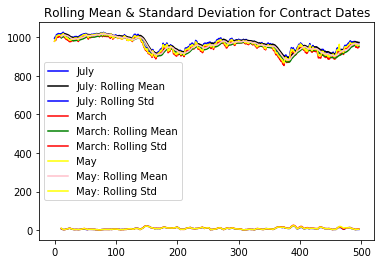

Results of Dickey-Fuller Test for March:
Test Statistic                  -2.291456
p-value                          0.174739
#Lags Used                       2.000000
Number of Observations Used    494.000000
Critical Value (1%)             -3.443657
Critical Value (5%)             -2.867408
Critical Value (10%)            -2.569896
dtype: float64

Results of Dickey-Fuller Test for May:
Test Statistic                  -2.156043
p-value                          0.222584
#Lags Used                       1.000000
Number of Observations Used    495.000000
Critical Value (1%)             -3.443630
Critical Value (5%)             -2.867397
Critical Value (10%)            -2.569889
dtype: float64

Results of Dickey-Fuller Test for July:
Test Statistic                  -2.192815
p-value                          0.208864
#Lags Used                       1.000000
Number of Observations Used    495.000000
Critical Value (1%)             -3.443630
Critical Value (5%)             -2.867397
Critical

In [7]:
 #Plot rolling statistics:
orig_july = plt.plot(july['Close'], color='blue',label='July')
mean_july = plt.plot(rolmean_july, color='black', label='July: Rolling Mean')
std_july = plt.plot(rolstd_july, color='blue', label = 'July: Rolling Std')

orig_march = plt.plot(march['Close'], color='red',label='March')
mean_march = plt.plot(rolmean_march, color='green', label='March: Rolling Mean')
std_march = plt.plot(rolstd_march, color='red', label = 'March: Rolling Std')

orig_may = plt.plot(may['Close'], color='yellow',label='May')
mean_may = plt.plot(rolmean_may, color='pink', label='May: Rolling Mean')
std_may = plt.plot(rolstd_may, color='yellow', label = 'May: Rolling Std')

plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation for Contract Dates')
plt.show(block=False)

from statsmodels.tsa.stattools import adfuller

#Perform Dickey-Fuller test on March:
print('Results of Dickey-Fuller Test for March:')
dftest = adfuller(march['Close'], autolag='AIC')
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)
print()
#Perform Dickey-Fuller test on May:
print('Results of Dickey-Fuller Test for May:')
dftest = adfuller(may['Close'], autolag='AIC')
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)
print()
#Perform Dickey-Fuller test on July:
print('Results of Dickey-Fuller Test for July:')
dftest = adfuller(july['Close'], autolag='AIC')
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)


#p-value is greater than 0.05 for all 3 months, so the data is non stationary hence there exits seasonality

# **Seasonality**

In [0]:
#Check if data is seasonal
from random import randrange
from pandas import Series
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.tsa.api as smt
from statsmodels.tsa.seasonal import seasonal_decompose

In [0]:
def decompose(month, data, frq):
  print('{} contracts decomposition'.format(month))
  series =  np.array(data['Close'], dtype=float)
  result = seasonal_decompose(series, model='additive', freq=frq)
  result.plot()
  pyplot.show()

March contracts decomposition


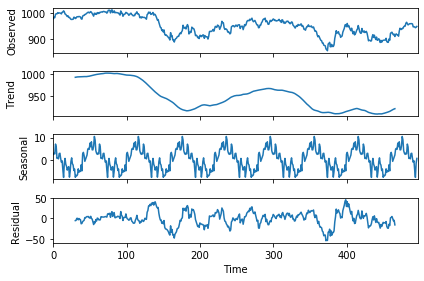

In [51]:
# 20 trading days a month
# 60 trading days a year
# ~ 1/4th
#March
decompose("March", march,60)

May contracts decomposition


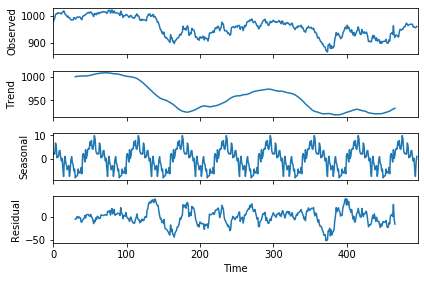

In [52]:
#May
decompose("May", may, 60)

July contracts decomposition


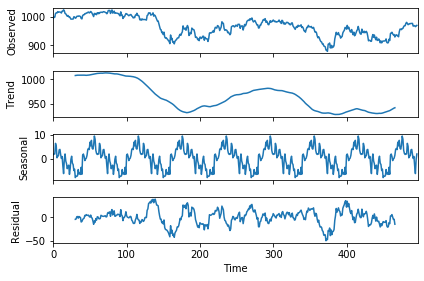

In [53]:
#July
decompose("July", july, 60)

In [0]:
def tsplot(month, y, lags=None, figsize=(12, 7), style='bmh'):
    """
        Plot time series, its ACF and PACF, calculate Dickey–Fuller test
        
        y - timeseries
        lags - how many lags to include in ACF, PACF calculation
    """
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
        
    with plt.style.context(style):    
        fig = plt.figure(figsize=figsize)
        layout = (2, 2)
        ts_ax = plt.subplot2grid(layout, (0, 0), colspan=2)
        acf_ax = plt.subplot2grid(layout, (1, 0))
        pacf_ax = plt.subplot2grid(layout, (1, 1))
        
        y.plot(ax=ts_ax)
        p_value = sm.tsa.stattools.adfuller(y)[1]
        ts_ax.set_title('{} Time Series Analysis Plots\n Dickey-Fuller: p={:.5f}'.format(month, p_value))
        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax)
        plt.tight_layout()

/usr/local/lib/python3.6/dist-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


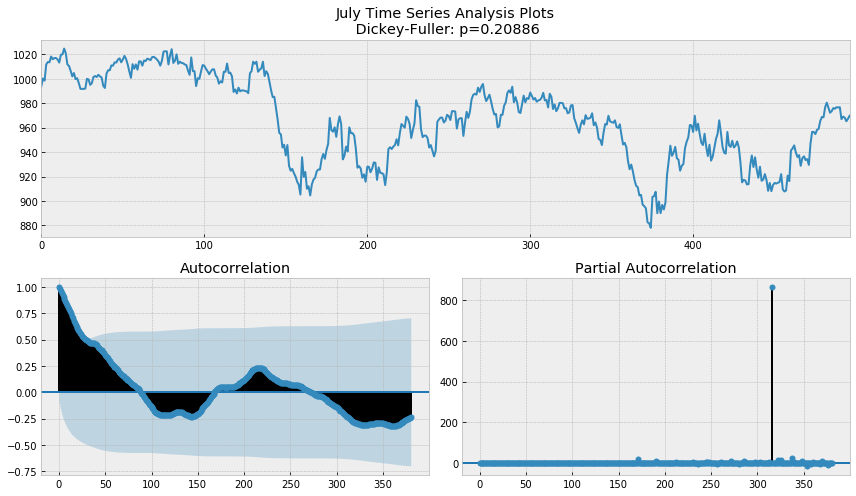

In [38]:
tsplot("July", july['Close'], lags=380)

/usr/local/lib/python3.6/dist-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


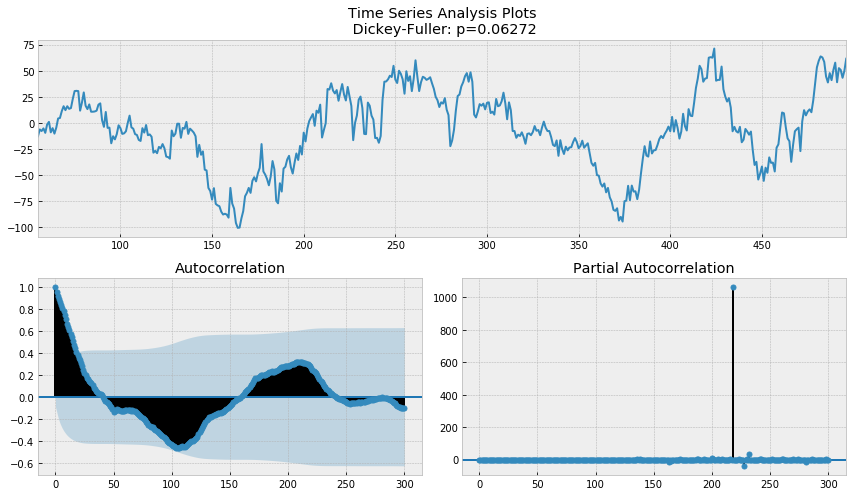

In [22]:
july_diff = july['Close'] - july['Close'].shift(50)
tsplot("July",july_diff[55:], lags=300)

/usr/local/lib/python3.6/dist-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


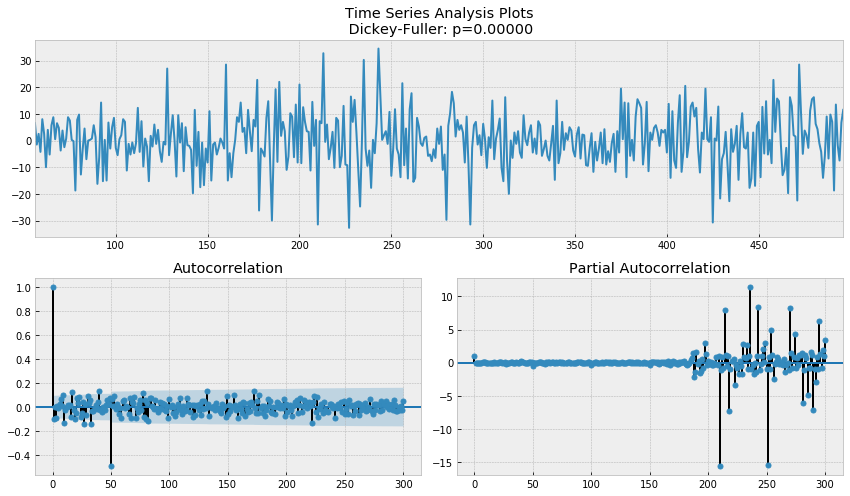

In [19]:
july_diff = july_diff - july_diff.shift(1)
tsplot(july_diff[55+1:], lags=300)

Now the data is **Seasonaly** but **not stationary**

# **SARIMA**
Predicting for non-stationary seasonal data.
The MAE shows that the model performs well for unknown data.

In [0]:
  import statsmodels.api as sm
  import warnings

In [0]:
#Testing for july, august 2019
end_of_june2019_march= 422
end_of_june2019_may= 422
end_of_june2019_july= 422

In [0]:
#Finding the best parameters
def best_sarima_model(train_data,p,q,s, P,Q,d=1,D=1):
    best_model_aic = np.Inf 
    best_model_bic = np.Inf 
    best_model_hqic = np.Inf
    best_model_order = (0,0,0)
    models = []
    for p_ in p:
        for q_ in q:
            for P_ in P:
                for Q_ in Q:
                    no_of_lower_metrics = 0
                    warnings.filterwarnings("ignore")
                    model = sm.tsa.statespace.SARIMAX(train_data,order=(p_,d,q_), seasonal_order=(P_,D,Q_,s),
                                                      enforce_stationarity=False, enforce_invertibility=False).fit()
                    if model.aic <= best_model_aic: no_of_lower_metrics+=1
                    if model.bic <= best_model_bic: no_of_lower_metrics+=1
                    if model.hqic <= best_model_hqic:no_of_lower_metrics+=1
                    if no_of_lower_metrics >= 2:
                        best_model_aic = np.round(model.aic,0)
                        best_model_bic = np.round(model.bic,0)
                        best_model_hqic = np.round(model.hqic,0)
                        best_model_order = (p_,d,q_,P_,D,Q_,s)
                        current_best_model = model
                        models.append(model)
                        print("Best model so far: SARIMA" +  str(best_model_order) + 
                              " AIC:{} BIC:{} HQIC:{}".format(best_model_aic,best_model_bic,best_model_hqic)+
                              " resid:{}".format(np.round(np.exp(current_best_model.resid).mean(),3)))

    return (best_model_order[0:3], best_model_order[3:7])

In [0]:
#defining the Sarima model
def SARIMAmodel(data, div, ordr, s_ordr, weekday):
  train_data, test_data = data[0:div], data[div:]
  train_ar = train_data.values
  test_ar = test_data.values
  history = [x for x in train_ar]
  predictions = list()
  # predicting for next N days
  week_abs = 0
  N = min(5, len(test_data))
  warnings.filterwarnings("ignore")
  model = sm.tsa.statespace.SARIMAX(endog=history, order=ordr, seasonal_order=s_ordr,
                             enforce_invertibility=False)
  model_fit = model.fit()
  output = model_fit.forecast(N)
  print("Actual: ", test_ar[0:N])
  print("Predicted: ", output)
  error = []
  for x in range(N):
    week_abs = week_abs + abs(output[x]-test_ar[x])
    error.append(output[x]-test_ar[x])
    weekday[x] = weekday[x] + output[x]-test_ar[x]
  print("Error: ", error)
  predictions.extend(output)
  history.extend(output)
  naive = [train_ar[-1]]*N
  #print(predictions)
  mae = mean_absolute_error(test_ar[0:N], predictions)
  mae_same = mean_absolute_error(test_ar[0:N], naive)
  return mae, mae_same, predictions, naive, week_abs, weekday

In [0]:
#plotting the actual and predicted data
def plotGraph(month, test_data, predictions, naive):
  plt.style.use('seaborn-white')
  plt.figure(figsize=(12,7))
  plt.plot(test_data.index, test_data, color='blue', label='{}: Actual Test Prices'.format(month))
  plt.plot(test_data.index, predictions, color='green', linestyle='dashed', 
           label='Predicted Prices')
  plt.plot(test_data.index, naive, color='red', linestyle='dashed', 
          label='Naive Prices')
  plt.title('SARIMA model for {} Contracts'.format(month))
  plt.xlabel('Dates')
  plt.ylabel('Prices')
  plt.legend(loc='best')

In [0]:
#predicting using SARIMA model and plotting the results
def predict(month, data, div, ordr, s_ordr):
  test_data = data[div:]
  predictions = list()
  naive = list()
  weekday = [0, 0, 0, 0, 0]
  total = 0
  cnt = 0
  print("Sarima Model for {} contracts\n".format(month))
  while div < len(data):
    mae, mae_naive, pre, nve, abs_week, weekday = SARIMAmodel(data, div, ordr, s_ordr, weekday)
    naive.extend(nve)
    predictions.extend(pre)
    total = total + abs_week
    div += min(5, len(data)-div+1)
    cnt = cnt + 1
    print("Week " , cnt, "sarima " , mae, "naive ", mae_naive)
    print()
  
  print("Weekday error")
  for x in range(5):
    print(x, weekday[x]/cnt)
  print()

  sarima_mae = mean_absolute_error(predictions, test_data)
  naive_mae = mean_absolute_error(naive, test_data)
  print("Average MAE for {} using each step: ".format(month), "[SARIMA] ", sarima_mae, "[Naive] ",naive_mae)
  plotGraph(month, test_data, predictions, naive)
  return total

In [0]:
#March contracts
#Don't run this block often!!!
march_ordr, march_s_ordr = best_sarima_model(march['Close'].values, 
                                             p=range(4),q=range(4),P=range(4),
                                             Q=range(4), s=3)
print("March best SARIMA parameters: ", march_ordr, march_s_ordr)


Best model so far: SARIMA(0, 1, 0, 0, 1, 0, 3) AIC:3384.0 BIC:3388.0 HQIC:3386.0 resid:inf
Best model so far: SARIMA(0, 1, 0, 0, 1, 1, 3) AIC:3054.0 BIC:3063.0 HQIC:3058.0 resid:inf
Best model so far: SARIMA(0, 1, 0, 0, 1, 2, 3) AIC:3035.0 BIC:3047.0 HQIC:3040.0 resid:inf
Best model so far: SARIMA(0, 1, 0, 0, 1, 3, 3) AIC:3019.0 BIC:3035.0 HQIC:3025.0 resid:inf
Best model so far: SARIMA(0, 1, 1, 0, 1, 3, 3) AIC:3012.0 BIC:3033.0 HQIC:3020.0 resid:inf
Best model so far: SARIMA(0, 1, 2, 0, 1, 3, 3) AIC:3006.0 BIC:3031.0 HQIC:3016.0 resid:inf
Best model so far: SARIMA(0, 1, 3, 0, 1, 3, 3) AIC:2997.0 BIC:3026.0 HQIC:3009.0 resid:inf
March best SARIMA parameters:  (0, 1, 3) (0, 1, 3, 3)


Sarima Model for March contracts

Actual:  [928.25 926.25 931.   924.5  925.75]
Predicted:  [938.12879314 939.30519159 939.87350529 939.29785761 938.15297496]
Error:  [9.878793142621362, 13.055191591899302, 8.873505289893501, 14.797857607951414, 12.402974959426388]
Week  1 sarima  11.801664518358393 naive  13.35

Actual:  [929.25 922.25 908.5  891.75 894.25]
Predicted:  [925.78514651 927.03880635 926.24943304 925.25229713 925.30480348]
Error:  [-3.464853490415294, 4.788806346361071, 17.74943304390365, 33.50229712756334, 31.054803476811685]
Week  2 sarima  18.11203869701101 naive  17.95

Actual:  [893.75 890.75 891.75 907.5  916.  ]
Predicted:  [894.86620033 894.5182808  893.33646247 893.50065297 894.62283541]
Error:  [1.1162003288832238, 3.7682807990829588, 1.5864624715644595, -13.999347025842553, -21.37716459033959]
Week  3 sarima  8.369491043142556 naive  8.3

Actual:  [905.25 914.   903.75 897.   906.5 ]
Predicted:  [915.15649148 914.02530203 914.072537   915.275964   914.31099885]


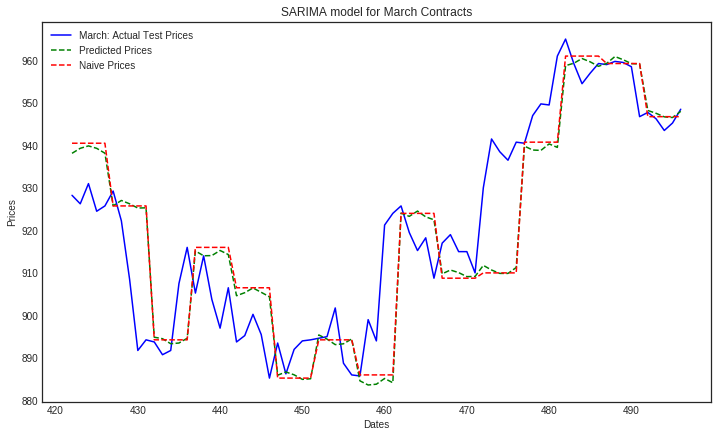

In [0]:
march_total = predict("March", march['Close'], end_of_june2019_march, (1, 1, 1), (1, 1, 1, 4))
#Best model with annual seasonality (s=12) had mae = 12.0049
#Best model with quaterly seasonality (0, 1, 3) (0, 1, 3, 4) (s=4) had mae =  11.31970
#Best model with quaterly seasonality (0, 1, 2) (0, 1, 2, 4) (s=4) has mae =  11.36248
#Average MAE for March using each step (0, 1, 2) (0, 1, 2, 3):  10.812424
#Average MAE for March using each step (0, 1, 3) (0, 1, 3, 3):  11.05874

In [0]:
#May contracts
#Don't run this block often!!!
may_ordr, may_s_ordr = best_sarima_model(may['Close'].values, 
                                         p=range(3),q=range(3),P=range(3),
                                         Q=range(3), s=4)
print("May best SARIMA parameters: ", may_ordr, may_s_ordr)

Best model so far: SARIMA(0, 1, 0, 0, 1, 0, 4) AIC:3348.0 BIC:3352.0 HQIC:3350.0 resid:inf
Best model so far: SARIMA(0, 1, 0, 0, 1, 1, 4) AIC:3013.0 BIC:3022.0 HQIC:3017.0 resid:inf
Best model so far: SARIMA(0, 1, 0, 0, 1, 2, 4) AIC:2988.0 BIC:3000.0 HQIC:2993.0 resid:inf
Best model so far: SARIMA(0, 1, 1, 0, 1, 2, 4) AIC:2982.0 BIC:2998.0 HQIC:2988.0 resid:inf
Best model so far: SARIMA(0, 1, 2, 0, 1, 2, 4) AIC:2977.0 BIC:2998.0 HQIC:2985.0 resid:inf
May best SARIMA parameters:  (0, 1, 2) (0, 1, 2, 4)


Sarima Model for May contracts

Actual:  [937.   935.25 940.5  934.5  935.75]
Predicted:  [946.47736795 947.60357659 948.2287137  947.60690773 946.58607738]
Error:  [9.47736794501418, 12.353576593285197, 7.728713696212822, 13.106907731107981, 10.836077382216331]
Week  1 sarima  10.700528669567301 naive  12.15

Actual:  [939.   933.25 920.5  903.5  905.75]
Predicted:  [935.88162864 937.06338879 936.35051788 935.36055653 935.50559568]
Error:  [-3.1183713607985055, 3.8133887883071793, 15.850517883182988, 31.860556531822, 29.75559568104177]
Week  2 sarima  16.87968604903049 naive  16.65

Actual:  [905.25 902.   903.   918.5  927.  ]
Predicted:  [906.38124075 905.99303521 904.91773068 905.07531841 906.23253346]
Error:  [1.1312407531613644, 3.9930352117538632, 1.9177306843071165, -13.4246815919671, -20.76746653816474]
Week  3 sarima  8.246830955870838 naive  8.2

Actual:  [917.   925.25 915.   908.25 917.5 ]
Predicted:  [926.11501394 925.09193403 925.13194299 926.36435654 925.38631626]
Error

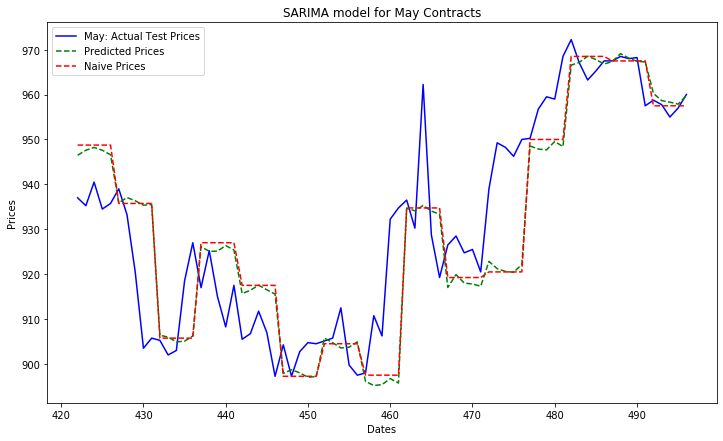

In [0]:
may_total = predict("May", may['Close'], end_of_june2019_may, (1, 1, 1), (1, 1, 1, 4))
#Average MAE for May using each step (0, 1, 3) (2, 1, 3, 4):  10.56394478195337
#Average MAE for May using each step (0, 1, 2) (0, 1, 2, 4):  10.7585

In [0]:
#July contacts
#Don't run this block often!!!
july_ordr, july_s_ordr = best_sarima_model(july['Close'].values, 
                                           p=range(4),q=range(4),
                                           P=range(4),Q=range(4), s=4)
print("May best SARIMA parameters: ", july_ordr, july_s_ordr)

Best model so far: SARIMA(0, 1, 0, 0, 1, 0, 4) AIC:5134.0 BIC:5138.0 HQIC:5136.0 resid:inf
Best model so far: SARIMA(0, 1, 0, 0, 1, 1, 4) AIC:4633.0 BIC:4642.0 HQIC:4637.0 resid:inf
Best model so far: SARIMA(0, 1, 0, 0, 1, 2, 4) AIC:4612.0 BIC:4626.0 HQIC:4618.0 resid:inf
Best model so far: SARIMA(0, 1, 0, 0, 1, 3, 4) AIC:4580.0 BIC:4598.0 HQIC:4587.0 resid:inf
Best model so far: SARIMA(0, 1, 1, 0, 1, 3, 4) AIC:4570.0 BIC:4593.0 HQIC:4579.0 resid:inf
Best model so far: SARIMA(0, 1, 3, 0, 1, 3, 4) AIC:4564.0 BIC:4596.0 HQIC:4577.0 resid:inf


KeyboardInterrupt: ignored

Sarima Model for July contracts

Actual:  [945.5  944.25 949.25 943.75 945.25]
Predicted:  [954.18911919 955.08860471 954.7310121  955.14149757 954.77260693]
Error:  [8.689119193398938, 10.838604710755703, 5.481012095711435, 11.39149756844597, 9.522606933184875]
Week  1 sarima  9.184568100299384 naive  10.9

Actual:  [948.75 944.   931.75 915.25 917.25]
Predicted:  [944.94825797 947.03966413 944.6885611  944.11424732 943.64903344]
Error:  [-3.801742026434681, 3.0396641272496936, 12.938561101069467, 28.864247322926417, 26.399033439356458]
Week  2 sarima  15.008649603407344 naive  15.25

Actual:  [916.75 913.5  913.75 929.   937.25]
Predicted:  [917.31570928 918.3397078  916.8028555  917.33363869 919.1077979 ]
Error:  [0.5657092814354883, 4.839707804789782, 3.0528555001905033, -11.666361305291616, -18.14220209900884]
Week  3 sarima  7.653367198143246 naive  7.9

Actual:  [927.75 935.75 925.75 919.   928.  ]
Predicted:  [936.45479495 936.02343227 936.00139489 936.97103112 936.05437718]
Er

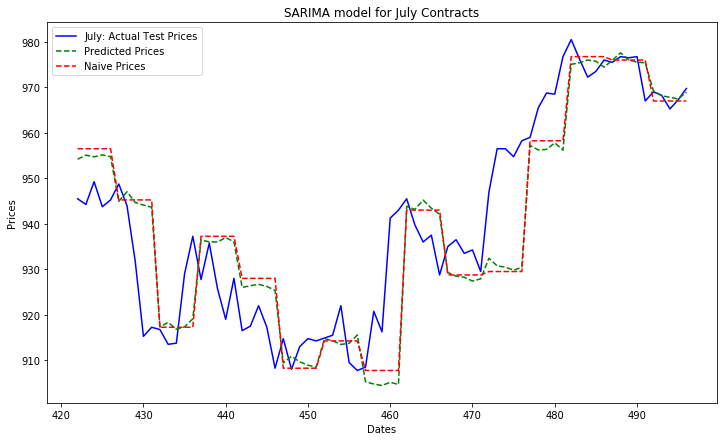

In [0]:
july_total = predict("July", july['Close'], end_of_june2019_july, (1, 1, 3), (1, 1, 2, 4))
#Average MAE for July using each step (0, 1, 2) (0, 1, 2, 4):  6.91116
#Average MAE for July using each step (0, 1, 3) (1, 1, 3, 4):  6.9492

In [0]:
#optimization
(march_total + may_total + july_total)/15

142.01961222995124